# Initial Statistics

In [1]:
import mysql.connector
import operator

import numpy as np
import pandas as pd

import datetime

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#import plotly as py
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

import ipywidgets as widgets
# import seaborn as sns


In [2]:
%matplotlib inline 
po.init_notebook_mode(connected=True)

In [3]:
 pd.set_option("display.max_rows", 5000)

In [4]:
 pd.reset_option("^display") 

- **Number of metabolites**

In [68]:
#Ir buscar toda a tabela bioanalysis_metabolite à BD

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select * from bioanalysis_metabolite ''', cnx, parse_dates=True)

df = pd.DataFrame(sql_query, columns=['id','common_name', 'id_bioeco','inchi', 'inchi_key', 'smiles'])

df

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [69]:
#Contar nº de ids, praticamente contar o número de linhas
df['id'].count()

4304

Existe *4304* metabolitos na base de dados **Bioanalysis**.

In [105]:
# Quais são os metabolitos duplicados? 

df_met_dupl = df[df.duplicated(['common_name','inchi','inchi_key', 'smiles'], keep = False)]

dupl_met = {}  # create a dictionary {metab:[id,id,...]}
for k,g in df_met_dupl.groupby(['common_name'])['id']:
    g = list(g)
    if k not in dupl_met:
        dupl_met[k] = g
    elif k in dupl_met:
        dupl_met[k].extend(g)
        
        
# print(df[df.common_name == 'Glycyrrhizic acid'])   
# the metab 'Glycyrrhizic acid' has 3 ids for the same metabolite but just 2 of them are equal, the other as different InChIKey

print(dupl_met)
    
                

{'4-Benzyloxyphenylacetic acid': [1159, 4062], 'AC1L2SOM': [1204, 3135], 'Creatine phosphate disodium salt': [546, 3567], 'Glycyrrhizic acid': [2592, 3708], 'HYDROXOCOBALAMIN': [2745, 3973], 'L-cystine': [679, 3367], 'Pregna-1,4-diene-3,20-dione,16,21-bis(acetyloxy)-9-fluoro-11,17-dihydroxy-, (11b,16a)-': [3004, 3776], 'SCHEMBL952350': [2945, 4008], 'Temsirolimus': [169, 3514], 'aluminium triphosphate': [3059, 3805], 'deltamethrin': [624, 2567], 'pimaricin': [2974, 4196]}


**ATENTION:** Use this dictionary above if one of the metabolite case studies is a duplicate!!

In [7]:
#Limpar duplicados, o bioeconomics tem um erro de duplicados então não podemos contar a coluna id_bioeco
#senão não há duplicados para apagar

df_cleaned = df[~df.duplicated(['common_name','inchi','inchi_key', 'smiles'])]

In [8]:
df_cleaned

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [9]:
#Contar nº de ids únicos, é como contar o nº de linhas outra vez
df_cleaned['id'].nunique()

4292

Existe *4292* metabolitos na base de dados **Bioanalysis**, sem o erro de duplicação do **Bioeconomis**.

In [10]:
cnx.close()

Usando agora outra query vamos contar o número de metabolitos para apenas um determinado período de tempo **(01/18 a 06/19)**. Esta query será representativa do número total de preços existentes no **bioanalysis** e que estão apenas nas unidades das **g e derivados**.

NOTA: Será que vale a pena apenas selecionar os preços distintos e retirar os duplicados??

In [11]:
# Dataframe com query a selecionar todos os preços com unidades de g ou derivados, e no período de tempo entre 01/18 e 06/19

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select bioanalysis_metabolite_price.metabolite_id       as metab_id,  
                                  bioanalysis_metabolite.common_name                      as metab_name,
                                  bioanalysis_metabolite_price.date, 
                                  bioanalysis_metabolite_price.price                      as price, 
                                  bioanalysis_metabolite_price.amount                     as amount, 
                                  bioanalysis_metabolite_price.unity                      as unity, 
                                  if(provider.name is null, "None", provider.name)        as provider_name, 
                                  bioanalysis_metabolite_price.source                     as source,
                                  price/amount                                            as price_per_unity,
                                  price/amount*convert_to_g(unity)                        as price_per_g,
                                  year(date)                                              as year, 
                                  month(date)                                             as month
                                  from bioanalysis_metabolite_price
                                  JOIN provider 
                                      on provider.id = bioanalysis_metabolite_price.provider_id
                                  JOIN bioanalysis_metabolite
                                      on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                  where convert_to_g(unity) is not null and ((year(date)*10000) + (month(date)*100) between 20180100 and 20190600)
                              ''', cnx, index_col = 'date', parse_dates=True)  

df = pd.DataFrame(sql_query, columns=['metab_id','metab_name', 'price','amount', 'unity', 'provider_name', 'source', 'price_per_unity', 'price_per_g', 'year', 'month'])

print(df)

                     metab_id                    metab_name  price  amount  \
date                                                                         
2018-01-11 21:39:13         1                    tobramycin  158.0     1.0   
2018-02-11 23:46:53         1                    tobramycin  158.0     1.0   
2018-03-11 23:47:07         1                    tobramycin  158.0     1.0   
2018-04-11 22:47:14         1                    tobramycin  158.0     1.0   
2018-05-11 22:47:27         1                    tobramycin  158.0     1.0   
...                       ...                           ...    ...     ...   
2019-05-06 11:26:13      4128  2-Methyl-5-nitro-2H-indazole  760.0    10.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole   30.0   500.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole   90.0     1.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole  380.0     5.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole  760

In [12]:
#counting all the metabolites in the DB BIOANALYSIS
df['metab_id'].nunique()

2283

Existem *2283* metabolitos na base de dados **bioanalysis** que têm preços na unidade das gramas e na janela de tempo determinada. 

In [13]:
# Ver quantos valores nulos existe em cada coluna
df.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity    295
price_per_g        295
year                 0
month                0
dtype: int64

In [14]:
df[df.amount == 0]  #existe preços onde o amount é zero ...

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-10-22 15:22:54,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-22 16:23:15,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11
2018-12-07 14:41:16,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,12
2019-01-07 14:41:27,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,1
2019-02-07 14:41:35,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,2
2019-03-07 14:41:44,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,3
2019-04-07 13:41:51,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,4
2018-10-22 23:49:04,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-23 00:50:09,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11


Temos preços onde o amount é zero, isto faz com que os preços por unidade e por gramas sejam nulos. É preciso tratar disto.

In [15]:
df.count()

metab_id           836888
metab_name         836524
price              836888
amount             836888
unity              836888
provider_name      836888
source             836888
price_per_unity    836593
price_per_g        836593
year               836888
month              836888
dtype: int64

A dataframe *df* tem 836888 preços.

In [16]:
#Criar nova dataframe onde não existem preços com amounts a 0
df_noNA = df[~(df['amount'] == 0)]

In [17]:
df_noNA.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity      0
price_per_g          0
year                 0
month                0
dtype: int64

Nova dataframe **df_noNA** não tem nulls nos preços. Está limpa de preços com amounts a zero.

In [18]:
# Contar o numero de metabolitos únicos, é o mesmo que antes
df_noNA['metab_id'].nunique()

2283

In [19]:
# Contar o número de preços, praticamente é o mesmo que ver nº de linhas
# Aqui dá para ver que o nulos na coluna de metab_name não foram apagados por isso é que são menos linhas (não é importante)
df_noNA.count()

metab_id           836593
metab_name         836229
price              836593
amount             836593
unity              836593
provider_name      836593
source             836593
price_per_unity    836593
price_per_g        836593
year               836593
month              836593
dtype: int64

A dataframe *df_noNA* tem 836593 preços! 

In [20]:
#Contar número de providers únicos
df_noNA['provider_name'].nunique()

126

Há *126 providers* diferentes na base de dados bioanalysis (contando provavelmente com os None's como sendo só um).

In [151]:
# Dataframe with no NAN and no duplicates!!! 

df_clean = df_noNA.reset_index().drop_duplicates().set_index('date')     # retirar duplicados incluindo o index e voltar a colocar o index

df_clean

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-01-11 21:39:13,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,1
2018-02-11 23:46:53,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,2
2018-03-11 23:47:07,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,3
2018-04-11 22:47:14,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,4
2018-05-11 22:47:27,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,5
2018-06-12 01:20:49,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,6
2018-07-12 02:29:45,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,7
2018-08-23 01:54:41,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,8
2018-09-23 01:54:58,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.00,158.00000,2018,9


In [145]:
df_clean.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity      0
price_per_g          0
year                 0
month                0
dtype: int64

In [146]:
# Numero de metabolitos
df_clean['metab_id'].nunique()

2283

In [147]:
# Número de preços
df_clean.count()

metab_id           825408
metab_name         825044
price              825408
amount             825408
unity              825408
provider_name      825408
source             825408
price_per_unity    825408
price_per_g        825408
year               825408
month              825408
dtype: int64

In [148]:
#Contar número de providers únicos
df_clean['provider_name'].nunique()

126

Como se pode ver, esta nova dataframe **df_clean** para além de **não ter NAN** como a df_noNA não tinha, também **não tem duplicados**!

Isto não altera o número de metabolitos e providers únicos que continua a ser o mesmo, mas altera o número de preços: 
**825408 preços**

In [149]:
dupl_met

{'4-Benzyloxyphenylacetic acid': [1159, 4062],
 'AC1L2SOM': [1204, 3135],
 'Creatine phosphate disodium salt': [546, 3567],
 'Glycyrrhizic acid': [2592, 3708],
 'HYDROXOCOBALAMIN': [2745, 3973],
 'L-cystine': [679, 3367],
 'Pregna-1,4-diene-3,20-dione,16,21-bis(acetyloxy)-9-fluoro-11,17-dihydroxy-, (11b,16a)-': [3004,
  3776],
 'SCHEMBL952350': [2945, 4008],
 'Temsirolimus': [169, 3514],
 'aluminium triphosphate': [3059, 3805],
 'deltamethrin': [624, 2567],
 'pimaricin': [2974, 4196]}

In [152]:
# Alterar preços dos metabolitos duplicados para ficar tudo num metabolito!

df_clean1 = df_clean.copy()                                                   # to keep df_clean from being modified
 
for name in dupl_met:                                                         # for each name of the metabolite in dictionary of the duplicates
    id_old = dupl_met[name][1]                                                # save as id_old the id that its gonna change (preferably the more recent id)
    id_new = dupl_met[name][0]                                                # save as id_new the id for which the id_old is gonna change (preferably the older one)
    if name in df_clean1.metab_name.unique():                                 # if that metabolite name exists in the dataframe
        df_test = df_clean1[df_clean1.metab_name == name]                     # create a new df just with the prices for that metabolite name
#         print(df_test)
#         print(name, df_test.metab_id.unique(), id_new)
        if id_new in df_test.metab_id.unique():                               # if the new id exists as an id (this makes sure that if the id does not exist the old one doesn't need to be changed)
#             print(name, df_test.metab_id.unique(), id_new)
            df_clean1.loc[df_clean1.metab_id == id_old, 'metab_id'] = id_new    # then, change the old one for the new id
#     print(df_clean1[df_clean.metab_name == name])

  
# df_clean1.metab_id.nunique()
df_clean.metab_id.nunique()


2283

A dataframe **df_clean1** é a dataframe df_clean atualizada, **sem duplicados dos metabolitos**!

No entanto, em baixo continuamos a usar a df_clean.

 - **Number of prices per metabolite** (incluindo apenas os preços correspondentes às gramas)

In [26]:
#como se pode ver esta df só tem preços para gramas
df_clean['unity'].unique()

array(['g', 'mg', 'kg'], dtype=object)

In [27]:
#Fazer groupby por id do metabolito
for k,g in df_clean.groupby('metab_id'):
    print('Metabolite_id:', k)
    print('Num_price:', g.shape[0])

Metabolite_id: 1
Num_price: 498
Metabolite_id: 4
Num_price: 1126
Metabolite_id: 5
Num_price: 220
Metabolite_id: 7
Num_price: 362
Metabolite_id: 9
Num_price: 247
Metabolite_id: 10
Num_price: 9
Metabolite_id: 11
Num_price: 8
Metabolite_id: 12
Num_price: 307
Metabolite_id: 13
Num_price: 2577
Metabolite_id: 14
Num_price: 7
Metabolite_id: 17
Num_price: 152
Metabolite_id: 18
Num_price: 8
Metabolite_id: 23
Num_price: 78
Metabolite_id: 24
Num_price: 63
Metabolite_id: 25
Num_price: 10
Metabolite_id: 26
Num_price: 79
Metabolite_id: 27
Num_price: 31
Metabolite_id: 28
Num_price: 475
Metabolite_id: 30
Num_price: 627
Metabolite_id: 31
Num_price: 708
Metabolite_id: 32
Num_price: 659
Metabolite_id: 34
Num_price: 474
Metabolite_id: 36
Num_price: 955
Metabolite_id: 39
Num_price: 108
Metabolite_id: 40
Num_price: 241
Metabolite_id: 41
Num_price: 894
Metabolite_id: 42
Num_price: 104
Metabolite_id: 46
Num_price: 691
Metabolite_id: 48
Num_price: 1071
Metabolite_id: 49
Num_price: 430
Metabolite_id: 50
Num_pri

Metabolite_id: 476
Num_price: 370
Metabolite_id: 477
Num_price: 8
Metabolite_id: 478
Num_price: 20
Metabolite_id: 481
Num_price: 34
Metabolite_id: 485
Num_price: 86
Metabolite_id: 486
Num_price: 90
Metabolite_id: 491
Num_price: 18
Metabolite_id: 492
Num_price: 10
Metabolite_id: 495
Num_price: 15
Metabolite_id: 496
Num_price: 62
Metabolite_id: 497
Num_price: 75
Metabolite_id: 498
Num_price: 5
Metabolite_id: 500
Num_price: 45
Metabolite_id: 501
Num_price: 37
Metabolite_id: 502
Num_price: 769
Metabolite_id: 505
Num_price: 8
Metabolite_id: 506
Num_price: 50
Metabolite_id: 507
Num_price: 536
Metabolite_id: 508
Num_price: 276
Metabolite_id: 509
Num_price: 18
Metabolite_id: 510
Num_price: 948
Metabolite_id: 511
Num_price: 4
Metabolite_id: 516
Num_price: 40
Metabolite_id: 517
Num_price: 1800
Metabolite_id: 518
Num_price: 20
Metabolite_id: 523
Num_price: 154
Metabolite_id: 524
Num_price: 1945
Metabolite_id: 528
Num_price: 14
Metabolite_id: 530
Num_price: 1135
Metabolite_id: 532
Num_price: 290
M

Metabolite_id: 1332
Num_price: 4
Metabolite_id: 1333
Num_price: 1339
Metabolite_id: 1334
Num_price: 77
Metabolite_id: 1335
Num_price: 8
Metabolite_id: 1338
Num_price: 20
Metabolite_id: 1340
Num_price: 1705
Metabolite_id: 1344
Num_price: 368
Metabolite_id: 1347
Num_price: 571
Metabolite_id: 1352
Num_price: 8
Metabolite_id: 1353
Num_price: 522
Metabolite_id: 1355
Num_price: 492
Metabolite_id: 1356
Num_price: 26
Metabolite_id: 1357
Num_price: 41
Metabolite_id: 1361
Num_price: 8
Metabolite_id: 1362
Num_price: 142
Metabolite_id: 1365
Num_price: 448
Metabolite_id: 1367
Num_price: 852
Metabolite_id: 1368
Num_price: 852
Metabolite_id: 1369
Num_price: 8
Metabolite_id: 1371
Num_price: 66
Metabolite_id: 1373
Num_price: 523
Metabolite_id: 1375
Num_price: 168
Metabolite_id: 1376
Num_price: 44
Metabolite_id: 1377
Num_price: 54
Metabolite_id: 1378
Num_price: 223
Metabolite_id: 1379
Num_price: 217
Metabolite_id: 1380
Num_price: 1
Metabolite_id: 1381
Num_price: 91
Metabolite_id: 1383
Num_price: 8
Metab

Num_price: 102
Metabolite_id: 1838
Num_price: 615
Metabolite_id: 1839
Num_price: 750
Metabolite_id: 1840
Num_price: 544
Metabolite_id: 1843
Num_price: 680
Metabolite_id: 1845
Num_price: 1285
Metabolite_id: 1847
Num_price: 154
Metabolite_id: 1849
Num_price: 1466
Metabolite_id: 1851
Num_price: 72
Metabolite_id: 1852
Num_price: 34
Metabolite_id: 1853
Num_price: 568
Metabolite_id: 1855
Num_price: 544
Metabolite_id: 1856
Num_price: 753
Metabolite_id: 1858
Num_price: 20
Metabolite_id: 1859
Num_price: 103
Metabolite_id: 1861
Num_price: 1162
Metabolite_id: 1862
Num_price: 337
Metabolite_id: 1864
Num_price: 65
Metabolite_id: 1868
Num_price: 28
Metabolite_id: 1869
Num_price: 2180
Metabolite_id: 1870
Num_price: 7
Metabolite_id: 1872
Num_price: 14
Metabolite_id: 1873
Num_price: 42
Metabolite_id: 1874
Num_price: 47
Metabolite_id: 1876
Num_price: 25
Metabolite_id: 1878
Num_price: 277
Metabolite_id: 1880
Num_price: 12
Metabolite_id: 1883
Num_price: 27
Metabolite_id: 1887
Num_price: 454
Metabolite_id:

Metabolite_id: 2315
Num_price: 623
Metabolite_id: 2316
Num_price: 695
Metabolite_id: 2317
Num_price: 667
Metabolite_id: 2318
Num_price: 1542
Metabolite_id: 2320
Num_price: 432
Metabolite_id: 2322
Num_price: 1447
Metabolite_id: 2324
Num_price: 275
Metabolite_id: 2325
Num_price: 28
Metabolite_id: 2328
Num_price: 794
Metabolite_id: 2330
Num_price: 1032
Metabolite_id: 2332
Num_price: 975
Metabolite_id: 2334
Num_price: 9
Metabolite_id: 2335
Num_price: 220
Metabolite_id: 2337
Num_price: 474
Metabolite_id: 2338
Num_price: 435
Metabolite_id: 2341
Num_price: 18
Metabolite_id: 2342
Num_price: 2433
Metabolite_id: 2343
Num_price: 115
Metabolite_id: 2345
Num_price: 598
Metabolite_id: 2346
Num_price: 28
Metabolite_id: 2347
Num_price: 64
Metabolite_id: 2348
Num_price: 162
Metabolite_id: 2349
Num_price: 768
Metabolite_id: 2350
Num_price: 98
Metabolite_id: 2353
Num_price: 7
Metabolite_id: 2354
Num_price: 357
Metabolite_id: 2355
Num_price: 72
Metabolite_id: 2357
Num_price: 34
Metabolite_id: 2358
Num_pri

Num_price: 1618
Metabolite_id: 2795
Num_price: 10
Metabolite_id: 2797
Num_price: 23
Metabolite_id: 2798
Num_price: 747
Metabolite_id: 2800
Num_price: 318
Metabolite_id: 2801
Num_price: 148
Metabolite_id: 2802
Num_price: 9
Metabolite_id: 2803
Num_price: 10
Metabolite_id: 2804
Num_price: 584
Metabolite_id: 2806
Num_price: 273
Metabolite_id: 2807
Num_price: 159
Metabolite_id: 2808
Num_price: 31
Metabolite_id: 2811
Num_price: 1
Metabolite_id: 2813
Num_price: 17
Metabolite_id: 2815
Num_price: 88
Metabolite_id: 2819
Num_price: 682
Metabolite_id: 2821
Num_price: 51
Metabolite_id: 2824
Num_price: 33
Metabolite_id: 2827
Num_price: 75
Metabolite_id: 2829
Num_price: 9
Metabolite_id: 2832
Num_price: 104
Metabolite_id: 2833
Num_price: 50
Metabolite_id: 2834
Num_price: 576
Metabolite_id: 2835
Num_price: 172
Metabolite_id: 2836
Num_price: 2175
Metabolite_id: 2837
Num_price: 28
Metabolite_id: 2839
Num_price: 183
Metabolite_id: 2840
Num_price: 425
Metabolite_id: 2841
Num_price: 10
Metabolite_id: 2842
N

Num_price: 413
Metabolite_id: 3200
Num_price: 204
Metabolite_id: 3206
Num_price: 38
Metabolite_id: 3208
Num_price: 37
Metabolite_id: 3209
Num_price: 2
Metabolite_id: 3211
Num_price: 55
Metabolite_id: 3212
Num_price: 4
Metabolite_id: 3213
Num_price: 83
Metabolite_id: 3216
Num_price: 11
Metabolite_id: 3219
Num_price: 2
Metabolite_id: 3220
Num_price: 222
Metabolite_id: 3221
Num_price: 65
Metabolite_id: 3223
Num_price: 344
Metabolite_id: 3224
Num_price: 1232
Metabolite_id: 3226
Num_price: 81
Metabolite_id: 3228
Num_price: 318
Metabolite_id: 3230
Num_price: 342
Metabolite_id: 3231
Num_price: 736
Metabolite_id: 3232
Num_price: 187
Metabolite_id: 3236
Num_price: 85
Metabolite_id: 3238
Num_price: 1090
Metabolite_id: 3240
Num_price: 36
Metabolite_id: 3241
Num_price: 381
Metabolite_id: 3242
Num_price: 36
Metabolite_id: 3245
Num_price: 235
Metabolite_id: 3246
Num_price: 15
Metabolite_id: 3247
Num_price: 2
Metabolite_id: 3250
Num_price: 17
Metabolite_id: 3253
Num_price: 1855
Metabolite_id: 3255
Nu

Metabolite_id: 3666
Num_price: 144
Metabolite_id: 3668
Num_price: 128
Metabolite_id: 3669
Num_price: 37
Metabolite_id: 3670
Num_price: 12
Metabolite_id: 3671
Num_price: 4
Metabolite_id: 3672
Num_price: 64
Metabolite_id: 3673
Num_price: 250
Metabolite_id: 3674
Num_price: 14
Metabolite_id: 3675
Num_price: 12
Metabolite_id: 3677
Num_price: 45
Metabolite_id: 3678
Num_price: 1
Metabolite_id: 3679
Num_price: 418
Metabolite_id: 3680
Num_price: 75
Metabolite_id: 3681
Num_price: 1638
Metabolite_id: 3682
Num_price: 10
Metabolite_id: 3683
Num_price: 18
Metabolite_id: 3686
Num_price: 60
Metabolite_id: 3688
Num_price: 48
Metabolite_id: 3692
Num_price: 704
Metabolite_id: 3693
Num_price: 207
Metabolite_id: 3697
Num_price: 1275
Metabolite_id: 3700
Num_price: 1138
Metabolite_id: 3703
Num_price: 24
Metabolite_id: 3704
Num_price: 840
Metabolite_id: 3705
Num_price: 452
Metabolite_id: 3706
Num_price: 22
Metabolite_id: 3707
Num_price: 349
Metabolite_id: 3708
Num_price: 162
Metabolite_id: 3709
Num_price: 12


Metabolite_id: 4123
Num_price: 319
Metabolite_id: 4125
Num_price: 895
Metabolite_id: 4127
Num_price: 37
Metabolite_id: 4128
Num_price: 1331
Metabolite_id: 4129
Num_price: 1122
Metabolite_id: 4131
Num_price: 64
Metabolite_id: 4132
Num_price: 577
Metabolite_id: 4134
Num_price: 347
Metabolite_id: 4136
Num_price: 36
Metabolite_id: 4138
Num_price: 526
Metabolite_id: 4139
Num_price: 24
Metabolite_id: 4141
Num_price: 27
Metabolite_id: 4142
Num_price: 118
Metabolite_id: 4147
Num_price: 704
Metabolite_id: 4148
Num_price: 165
Metabolite_id: 4149
Num_price: 394
Metabolite_id: 4151
Num_price: 94
Metabolite_id: 4153
Num_price: 279
Metabolite_id: 4154
Num_price: 1570
Metabolite_id: 4156
Num_price: 681
Metabolite_id: 4157
Num_price: 695
Metabolite_id: 4161
Num_price: 32
Metabolite_id: 4163
Num_price: 25
Metabolite_id: 4166
Num_price: 5
Metabolite_id: 4167
Num_price: 18
Metabolite_id: 4168
Num_price: 17
Metabolite_id: 4171
Num_price: 593
Metabolite_id: 4173
Num_price: 147
Metabolite_id: 4174
Num_price

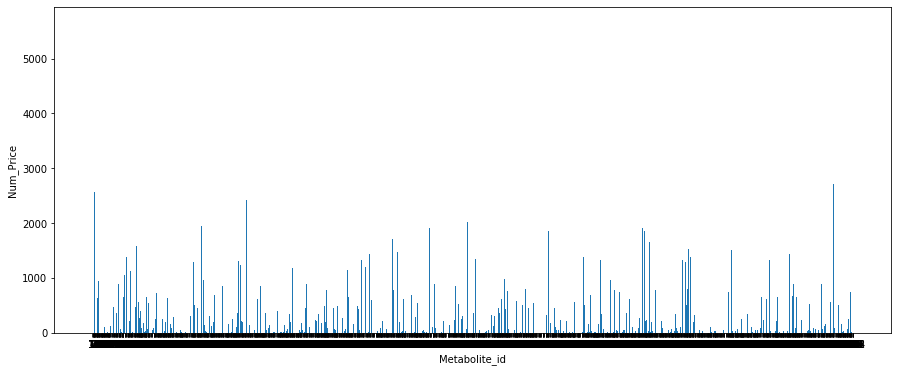

In [28]:
m_id = []
num_price = []
for k,g in df_clean.groupby('metab_id'):
    m_id.append(k)                               # Criar lista com os ids dos metabolitos
    num_price.append(g.shape[0])                 # Criar lista com o num de preços 
    
plt.figure(figsize=(15,6))                       # Para alterar o tamanho da figura, se ficar neste tamanho dá para ver a barra maior (senão não dá...)
plt.bar(m_id, num_price)                         # Criar gráfico de barras com as duas listas criadas antes
plt.xticks(m_id)
plt.xlabel('Metabolite_id')
plt.ylabel('Num_Price')
plt.show()

In [29]:
#Tentar pôr gráfico acima a dar para ordenar o eixo dos x pelos valores de y
price_met = {}                                                         
for k,g in df_clean.groupby('metab_id'):                                
    if k not in price_met:
        price_met[k] = g.shape[0]                                      #Create a dictionary with metabolite : num_prices
    elif k in price_met:
        print('There is a metabolite with more than one num_price.')

In [30]:
import operator
sort_price_met = sorted(price_met.items(), key=operator.itemgetter(1), reverse = True)  # The dictionary becomes a list of tuples


print(sort_price_met)  # This list of tuples is already sorte by the y value

[(187, 5662), (1175, 4652), (3743, 3403), (3122, 3376), (3519, 3302), (2300, 3077), (603, 2995), (1531, 2934), (1132, 2909), (2504, 2858), (3193, 2813), (3479, 2736), (4193, 2722), (2690, 2710), (1487, 2694), (3013, 2668), (2605, 2602), (1765, 2591), (13, 2577), (2020, 2542), (848, 2455), (2452, 2454), (2565, 2441), (2342, 2433), (3394, 2428), (433, 2422), (873, 2421), (323, 2408), (3532, 2403), (1442, 2401), (3080, 2262), (140, 2249), (1210, 2207), (3649, 2184), (1869, 2180), (2273, 2180), (2836, 2175), (557, 2147), (2710, 2092), (74, 2032), (2123, 2026), (2190, 2011), (1285, 2002), (2652, 1965), (300, 1964), (1632, 1963), (618, 1957), (1453, 1948), (1660, 1948), (524, 1945), (2446, 1935), (1499, 1921), (3113, 1921), (1908, 1915), (1152, 1912), (2054, 1893), (2678, 1890), (2581, 1857), (67, 1856), (3253, 1855), (3124, 1850), (3496, 1850), (902, 1830), (3975, 1810), (2618, 1803), (1068, 1802), (1986, 1801), (517, 1800), (2913, 1798), (802, 1734), (973, 1727), (1565, 1718), (1699, 1707)

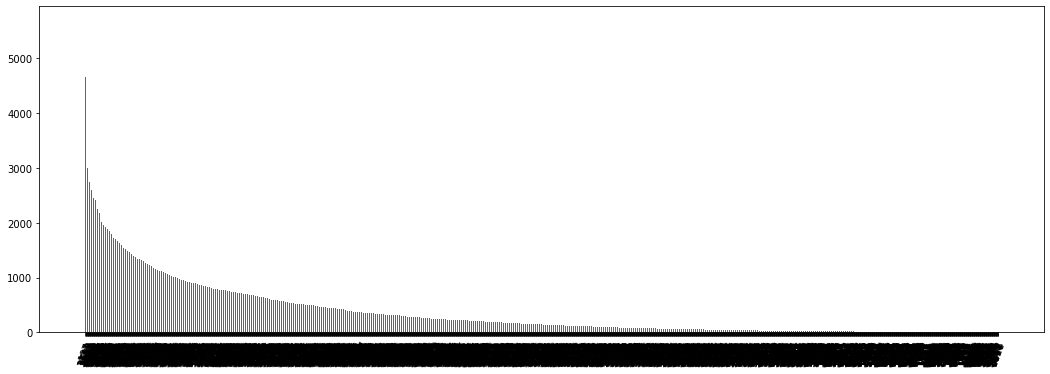

In [31]:
# Create a barplot with the x axis sorted by the y values

plt.figure(figsize=(18,6))  # Para alterar o tamanho da figura, se ficar neste tamanho dá para ver a barra maior (senão não dá)
plt.bar(range(len(sort_price_met)), [val[1] for val in sort_price_met], align='center')  
plt.xticks(range(len(sort_price_met)), [val[0] for val in sort_price_met])
plt.xticks(rotation=70)
plt.show()

In [32]:
# Creating interactive barplot with plotly

data = go.Bar(x = list(range(len(sort_price_met))), y = [val[1] for val in sort_price_met], name = 'Num_Prices')

layout = go.Layout(xaxis = go.layout.XAxis(
                        tickmode = 'array',
                        tickvals = list(range(len(sort_price_met))),
                        ticktext = [val[0] for val in sort_price_met],
                   title = 'Num_Prices_Per_Metabolite'))

#layout = go.Layout(barmode='overlay', title = 'Num_Prices_Per_Metabolite')
#layout = go.Layout(barmode='stack', title = 'Num_Prices_Per_Metabolite')  
#este é melhor para ver o numero total de preços de cada metabolito, ele acrescenta ao nº de preços de uma unidade o nº da outra unidade
                                                                    

fig = go.Figure(data  = data, layout = layout)
po.iplot(fig, show_link= False) # para ver aqui no jupyter
# po.plot(fig)                     # para ver num separador a parte

Como se pode ver é um pouco complicado explicar estes dados, porque são muitos. Talvez criar histogramas seja mais fácil.

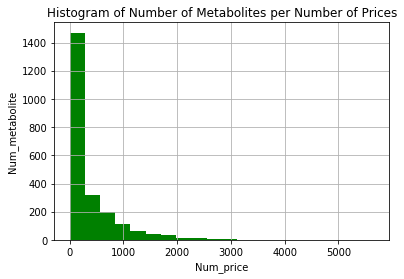

In [33]:
# Create an histogram num_prices per num_metabolites

plt.hist(num_price, 20, facecolor='g')
plt.xlabel('Num_price')
plt.ylabel('Num_metabolite')
plt.title('Histogram of Number of Metabolites per Number of Prices')
# plt.axis([0, 12000, 0, 2000])
plt.grid(True)
plt.show()

The histogram is right skewed, which means that the mean of the number of prices is typically greater than the median.

In [66]:
# Interactive histogram with plotly

fig = go.Figure(
      data=[go.Histogram(x= num_price, name = 'Num Price (g)', opacity = 0.8)]) #Creating histogram with num_price list

fig.update_layout(
    title_text='Histogram of Number of Metabolites per Number of Prices', # title of plot
    xaxis_title_text='Num_Price', # xaxis label
    yaxis_title_text='Num_Metabolite', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [35]:
#Calculate percentages

def percent_prices (less_than_number): # Create a function that gives the percentage of metabolites that have less than x prices
    print('How many metabolites have less than',less_than_number,'prices?')
    num_metab = 0
    for i in sort_price_met:
        if i[1] < less_than_number:
            num_metab += 1             # Every time de number of prices is lower than 2000 the num_metab adds 1

    print(num_metab*100/2283,'% (',num_metab,'of 2283 metabolites) \n')

In [36]:
# Percentages of how many metabolites exist with less than x prices?

percent_prices(2000)
percent_prices(1000)
percent_prices(500)
percent_prices(200)
percent_prices(100)

How many metabolites have less than 2000 prices?
98.11651335961454 % ( 2240 of 2283 metabolites) 

How many metabolites have less than 1000 prices?
90.05694261936048 % ( 2056 of 2283 metabolites) 

How many metabolites have less than 500 prices?
75.51467367498906 % ( 1724 of 2283 metabolites) 

How many metabolites have less than 200 prices?
56.28558913710031 % ( 1285 of 2283 metabolites) 

How many metabolites have less than 100 prices?
43.407796758650896 % ( 991 of 2283 metabolites) 



(Não sei bem para que é preciso ver isto...)

**DÚVIDA:** Posso usar só metabolitos com menos de 2000 preços? Porque a maior parte dos metabolitos está praticamente nessa gama...é isso que devo retirar desta análise?

- **Quantos metabolitos têm preços todos os meses?**  
**E 90% dos meses?**  (por provider ou não)

In [37]:
# Calculating how many metabolites have prices for **all** the months of the time window

dict_dates = {}                          # Create a dictionary that will have {metab_id : [(year,month)]}
t_window = []                            # Create a list of the months that include the time window
for k,g in df_clean.groupby(['metab_id','year','month'])['price_per_g']:  # group by metabolite id, year and month 
    k = list(k)                          # Turn to a list so the output is [metab_id, year, month]
#     print(len(g))
    num_p = len(g)                       # setting number of prices for each date and each met_id (for the future maybe)
    date = (k[1],k[2])                   # turn into a tuple as (year, month)
    if date not in t_window:
        t_window.append(date)            
    if k[0] not in dict_dates:
        dict_dates[k[0]] = [date]
    elif k[0] in dict_dates:
        dict_dates[k[0]].append(date)

        
# print(dict_dates)
# print(t_window)

num_met_all_month = 0                    # count the number of metabolites that have prices for all the months
met_all_month = []                       # list of the metabolites ids of those metabolites mentioned above
met_not_all_m = []                       # list of the metabolites ids that don't have prices for all the months
for id in dict_dates:                    
    if dict_dates[id] == t_window:       # comparing the two lists to see if they are equal!
        met_all_month.append(id)
        num_met_all_month += 1
    else: met_not_all_m.append(id)
        
               
print('Number of metabolites that have prices for all the months:', num_met_all_month, '\n')
# print('Metabolite Ids for the ones that have prices for all the months: \n', met_all_month, '\n')
print('Percentage:', num_met_all_month*100/len(m_id),'%', '(', num_met_all_month,'of',len(m_id),'metabolites) \n')


Number of metabolites that have prices for all the months: 506 

Percentage: 22.163819535698643 % ( 506 of 2283 metabolites) 



In [38]:
# Making sure there is no errors
dict_dates[met_not_all_m[0]]   # it really is lacking the first month of 2018

[(2018, 2),
 (2018, 3),
 (2018, 4),
 (2018, 5),
 (2018, 6),
 (2018, 7),
 (2018, 8),
 (2018, 9),
 (2018, 10),
 (2018, 11),
 (2018, 12),
 (2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6)]

In [39]:
# And for 90% of the months? 

num_met_90_month = 0                     # count the number of metabolites that have prices for 90% of the months
met_90_month = []                        # list of the metabolites ids of those metabolites mentioned above
met_not_90_m = []                        # list of the metabolites ids that don't have prices for 90% of the months
len_window = len(t_window)               # there are 18 months so the len will be 18
for id in dict_dates:
    len_id = len(dict_dates[id])        
    if all(date in t_window for date in dict_dates[id]):   # even if the metabolite doesn't have all the months they need to be contained on the t_window list
        if len_id/len_window >= 0.9:     # find the metabolites that have prices for 90% of the months by comparing the lens of the lists  
            met_90_month.append(id)
            num_met_90_month += 1
        else: met_not_90_m.append(id)

        
print('Number of metabolites that have prices for 90% of the months:', num_met_90_month, '\n')
# print('Metabolite Ids of the ones that have prices for 90% of the months: \n', met_90_month, '\n')
print('Percentage:', num_met_90_month*100/len(m_id),'%', '(', num_met_90_month,'of',len(m_id),'metabolites) \n')        

Number of metabolites that have prices for 90% of the months: 1364 

Percentage: 59.74594831362243 % ( 1364 of 2283 metabolites) 



In [40]:
# Making sure there is no errors
dict_dates[met_not_90_m[0]]   # it's definitely lesser than 90% of the months

[(2019, 6)]

**Question:** What do we do with the metabolites that don't have prices for 90% of the months? Do we filter them out?

- **Quantos metabolitos por provider têm preços para todos os meses?**
**E para 90% dos meses?** 

(Isto pode não ter grande interesse mas vamos ver)

In [41]:
# Calculating how many metabolites have prices for **all** the months of the time window

dict_dates_grp = {}                          # Create a dictionary that will have {metab_id : [(year,month)]}
for k,g in df_clean.groupby(['metab_id', 'provider_name','year','month'])['price_per_g']:  # group by metabo id, prov_name, year and month 
    k = list(k)                          # Turn to a list so the output is [metab_id, provider_name, year, month]
#     print(len(g))
    num_p = len(g)                       # setting number of prices for each date and each met_id-prov_name(for the future maybe)
    date = (k[2],k[3])                   # turn into a tuple as (year, month)
    grp = (k[0],k[1])                    # turn into a tuple as (metab_id, prov_name)
    if grp not in dict_dates_grp:
        dict_dates_grp[grp] = [date]
    elif grp in dict_dates_grp:
        dict_dates_grp[grp].append(date)


num_all_groups = len(dict_dates_grp)
# print(dict_dates_grp)

num_grp_all_month = 0                    # count the number of metabolites that have prices for all the months
grp_all_month = []                       # list of the metabolites ids of those metabolites mentioned above
grp_not_all_m = []                       # list of the metabolites ids that don't have prices for all the months
for grp in dict_dates_grp:                    
    if dict_dates_grp[grp] == t_window:       # comparing the two lists to see if they are equal!
        grp_all_month.append(grp)
        num_grp_all_month += 1
    else: grp_not_all_m.append(grp)
        
               
print('Number of metabolite-provider groups that have prices for all the months:', num_grp_all_month, '\n')
# print('Metab-Provider groups of the ones that have prices for all the months: \n', grp_all_month, '\n')
print('Percentage:', num_grp_all_month*100/num_all_groups,'%', '(', num_grp_all_month,'of',num_all_groups,'metab-provider groups) \n')
# print('-----------------------------------------------------')
# print('Groups of the ones that don\'t have prices for all months:\n', grp_not_all_m,'\n')

Number of metabolite-provider groups that have prices for all the months: 2009 

Percentage: 8.140524332428381 % ( 2009 of 24679 metab-provider groups) 



In [42]:
# Making sure there is no errors
dict_dates_grp[grp_not_all_m[0]]  # does not have prices for 2019

[(2018, 1),
 (2018, 2),
 (2018, 3),
 (2018, 4),
 (2018, 5),
 (2018, 6),
 (2018, 7),
 (2018, 8),
 (2018, 9),
 (2018, 10),
 (2018, 11),
 (2018, 12)]

In [43]:
# And for 90% of the months? 

num_grp_90_month = 0                     # count the number of groups that have prices for 90% of the months
grp_90_month = []                        # list of the groups of those mentioned above
grp_not_90_m = []                        # list of the groups that don't have prices for 90% of the months
len_window = len(t_window)               # there are 18 months so the len will be 18
for group in dict_dates_grp:
    len_grp = len(dict_dates_grp[group])        
    if all(date in t_window for date in dict_dates_grp[group]):   # even if the groups don't have all the months they need to be contained on the t_window list
        if len_grp/len_window >= 0.9:     # find the groups that have prices for 90% of the months by comparing the lens of the lists  
            grp_90_month.append(group)
            num_grp_90_month += 1
        else: grp_not_90_m.append(group)

        
print('Number of metab-provider groups that have prices for 90% of the months:', num_grp_90_month, '\n')
# print('Metabolite-Provider groups of the ones that have prices for 90% of the months: \n', grp_90_month, '\n')
print('Percentage:', num_grp_90_month*100/num_all_groups,'%', '(', num_grp_90_month,'of',num_all_groups,'metab-provider groups) \n')        
# print('-----------------------------------------------------')
# print('Metabolite-Provider groups of the ones that don\'t have prices for 90% of the months:\n', grp_not_90_m,'\n')

Number of metab-provider groups that have prices for 90% of the months: 5281 

Percentage: 21.39876007941975 % ( 5281 of 24679 metab-provider groups) 



**Question:** I don't even know how are these percentages needed for the work, but I'll leave them here.
Can we use only the groups that have 90% of months with prices??

And what about the providers?? Are they consistently lacking prices for several months independently of the metabolite?

- **Quantos providers têm preços para todos os meses?**
**E para 90% dos meses?** (independentemente do metabolito)

In [44]:
# Calculating how many providers have prices for **all** the months of the time window

dict_dates_prov = {}                     # Create a dictionary that will have {prov_name : [(year,month)]}
for k,g in df_clean.groupby(['provider_name','year','month'])['price_per_g']:  # group by provider_name, year and month 
    k = list(k)                          # Turn to a list so the output is [prov_name, year, month]
#     print(k)
#     print(g)
    num_p = len(g)                       # setting number of prices for each date and each prov_name (for the future maybe)
    date = (k[1],k[2])                   # turn into a tuple as (year, month)      
    if k[0] not in dict_dates_prov:
        dict_dates_prov[k[0]] = [date]
    elif k[0] in dict_dates_prov:
        dict_dates_prov[k[0]].append(date)

        
num_all_providers = len(dict_dates_prov)
# print(dict_dates_prov)

num_prov_all_month = 0                    # count the number of providers that have prices for all the months
prov_all_month = []                       # list of the providers names of those metabolites mentioned above
prov_not_all_m = []                       # list of the providers names that don't have prices for all the months
for name in dict_dates_prov:                    
    if dict_dates_prov[name] == t_window:       # comparing the two lists to see if they are equal!
        prov_all_month.append(name)
        num_prov_all_month += 1
    else: prov_not_all_m.append(name)
        
               
print('Number of providers that have prices for all the months:', num_prov_all_month, '\n')
print('Providers names of the ones that have prices for all the months: \n', prov_all_month, '\n')
print('Percentage:', num_prov_all_month*100/num_all_providers,'%', '(', num_prov_all_month,'of',num_all_providers,'providers) \n')
print('-----------------------------------------------------')
print('Providers names of the ones that don\'t have prices for all months:\n', prov_not_all_m,'\n')

Number of providers that have prices for all the months: 67 

Providers names of the ones that have prices for all the months: 
 ['ACINTS', 'ACS Scientific Inc', 'AK Scientific', 'AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Abamachem Ltd', 'Accela ChemBio Inc.', 'Advamacs', 'Aldlab', 'Alichem', 'Alinda Balt', 'AnalytiCon Discovery, GmbH', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Aronis', 'Axon Medchem', 'BIOTREND Chemicals, AG', 'BioBlocks', 'Biosynth AG', 'Cayman Europe', 'Chem4Pharma', 'ChemBridge Corp.', 'ChemBridge Corporation', 'ChemDiv, Inc.', 'ChemFaces', 'ChemShuttle', 'Curpys Chemicals', 'EDASA Scientific', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'Eximed', 'FCH Group', 'FCH Group Chemspace partner', 'Fluorochem', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Intermed Ltd', 'Key Organics, Ltd.', 'Labseeker', 'Life Chemicals Inc.', 'Manchester Organics', 'Manchester Organics Limited', 'Maybridge, Ltd.', 'Otava, Ltd.', 'Otava

In [45]:
# Making sure there is no errors
dict_dates_prov[prov_not_all_m[0]]   

[(2018, 11),
 (2018, 12),
 (2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6)]

In [46]:
# And for 90% of the months? 

num_prov_90_month = 0                     # count the number of providers that have prices for at least 90% of the months
prov_90_month = []                        # list of the providers names of those providers mentioned above
prov_not_90_m = []                        # list of the providers names that don't have prices for 90% of the months
len_window = len(t_window)               # there are 18 months so the len will be 18
for name in dict_dates_prov:
    len_name = len(dict_dates_prov[name])        
    if all(date in t_window for date in dict_dates_prov[name]):   # even if the providers doesn't have all the months they need to be contained on the t_window list
        if len_name/len_window >= 0.9:     # find the providers that have prices for 90% of the months by comparing the lens of the lists  
            prov_90_month.append(name)
            num_prov_90_month += 1
        else: prov_not_90_m.append(name)

        
print('Number of providers that have prices for 90% of the months:', num_prov_90_month, '\n')
print('Providers names of the ones that have prices for 90% of the months: \n', prov_90_month, '\n')
print('Percentage:', num_prov_90_month*100/num_all_providers,'%', '(', num_prov_90_month,'of',num_all_providers,'providers) \n')        
print('-----------------------------------------------------')
print('Providers names of the ones that don\'t have prices for 90% of the months:\n', prov_not_90_m,'\n')

Number of providers that have prices for 90% of the months: 72 

Providers names of the ones that have prices for 90% of the months: 
 ['ACINTS', 'ACS Scientific Inc', 'AK Scientific', 'AK Scientific Inc.', 'AK Scientific, Inc.', 'AKL Research LLP', 'AOBChem USA', 'Abamachem Ltd', 'Accela ChemBio Inc.', 'Advamacs', 'Aldlab', 'Alichem', 'Alinda Balt', 'AnalytiCon Discovery, GmbH', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Aronis', 'Axon Medchem', 'BIOTREND Chemicals, AG', 'BioBlocks', 'Biosynth AG', 'Cayman Europe', 'Chem4Pharma', 'ChemBridge Corp.', 'ChemBridge Corporation', 'ChemDiv, Inc.', 'ChemFaces', 'ChemShuttle', 'Curpys Chemicals', 'Debye Scientific', 'EDASA Scientific', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'EvoBlocks, Ltd.', 'Eximed', 'FCH Group', 'FCH Group Chemspace partner', 'Fluorochem', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Intermed Ltd', 'Key Organics, Ltd.', 'Labseeker', 'LeadGen Labs', 'Life Chemicals Inc.', 'Manchester O

In [47]:
# Making sure there is no errors
dict_dates_prov[prov_not_90_m[0]]   

[(2018, 11),
 (2018, 12),
 (2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6)]

**Question:** What do we do with the providers that don't have prices for 90% of the months consistently? Do we filter them out?

# **STUDY CASES** 
(boxplot)

Como só podemos fazer uma análise por metabolito, vou escolher o **metabolito 1175** porque é o segundo metabolito com mais preços e o que tem mais providers. **Será o meu caso de estudo.** No entanto, outros casos de estudo possíveis para além dos metabolitos com maior nº de preços e de providers, são os metabolitos com menor variância por mês/ano.

Para além disso, este é o único metabolito desta base de dados com esses dados, não existem duplicados. É preciso ter cuidado com isto porque *se houver duplicados é preciso usar a dataframe atualizada*.

In [194]:
df_1175 = df_clean[df_clean.metab_id == 1175]                  #filtrar o dataframe para apenas o metabolito 1175

In [157]:
df_1175

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:20,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,130.00,1.0,g,ACC Corporation,CHEMSPACE,130.0000,130.0000,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,854.35,5.0,g,ACC Corporation,CHEMSPACE,170.8700,170.8700,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,1322.64,25.0,g,ACC Corporation,CHEMSPACE,52.9056,52.9056,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,130.00,1.0,g,ACC Corporation,CHEMSPACE,130.0000,130.0000,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,854.35,5.0,g,ACC Corporation,CHEMSPACE,170.8700,170.8700,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,1322.64,25.0,g,ACC Corporation,CHEMSPACE,52.9056,52.9056,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,3


In [50]:
# Numero de preços que o metabolito 1175 
df_1175.shape[0]

4652

In [51]:
# Quantas unidades este dataframe tem 
df_1175.unity.unique()

array(['g', 'mg', 'kg'], dtype=object)

In [52]:
# Quantos providers diferentes este metabolito tem 
df_1175.provider_name.nunique()

67

In [53]:
# Quantos sources diferentes este metabolito tem 
df_1175.source.unique()

array(['CHEMSPACE', 'MolPort', 'OXChem'], dtype=object)

Este metabolito, 4-aminopyridine (id = 1175), tem **4652 preços**, contando já só com aqueles preços que fazem parte das **unidades das gramas**. Para além disso este metabolito tem preços de **67 providers**, mas apenas **3 sources** (o que até pode ser bom). 

In [54]:
for k,g in df_1175.groupby(['year','month'])['price_per_g']:
    print(list(k))
    print(g)

[2018, 1]
date
2018-01-10 11:35:20     22.4158
2018-01-10 11:35:22    130.0000
2018-01-10 11:35:22    170.8700
2018-01-10 11:35:22     52.9056
2018-01-10 11:35:20      1.0000
                         ...   
2018-01-10 11:35:15     14.0000
2018-01-10 11:35:15     10.0000
2018-01-10 11:35:22      4.6000
2018-01-10 11:35:22      3.4000
2018-01-10 11:35:22      2.2800
Name: price_per_g, Length: 293, dtype: float64
[2018, 2]
date
2018-02-10 11:41:22     22.4158
2018-02-10 11:41:22    130.0000
2018-02-10 11:41:22    170.8700
2018-02-10 11:41:22     52.9056
2018-02-10 11:41:22      1.0000
                         ...   
2018-02-10 11:41:18     14.0000
2018-02-10 11:41:18     10.0000
2018-02-10 11:41:22      4.6000
2018-02-10 11:41:22      3.4000
2018-02-10 11:41:22      2.2800
Name: price_per_g, Length: 273, dtype: float64
[2018, 3]
date
2018-03-10 11:43:03     22.41580
2018-03-10 11:43:04    130.00000
2018-03-10 11:43:04    170.87000
2018-03-10 11:43:04     52.90560
2018-03-10 11:43:03      

In [153]:
#Criar boxplot com preços por mês 
#Create plot with plotly

df_1175 = df_1175.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine prices per month',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)


dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    
month_list = []
d_y = {}
for k,g in df_1175.groupby(['year','month'])['price_per_g']:
    k = list(k)
    k[1] = dict_month[k[1]]
    k = k[1] +' '+ str(k[0])
    month_list.append(k)
# print(month_list)
    y = g.values
    if k not in d_y:
        d_y[k] = y
    elif k in d_y:
        d_y[k].append(y)
    else: print('There is a key lacking on the y dict.')


def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = d_y[s],
            name =  '{}'.format(s),
            boxpoints='outliers',
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    
# data = []
# for s in month_list:
#     trace1 = go.Box(
#         y = d_y[s],
#         name = '{}'.format(s),
#         boxpoints='outliers'
#     )

#     data.append(trace1)


signals = widgets.SelectMultiple(options = month_list, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)




interactive(children=(SelectMultiple(description='Date', options=('Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 201…

Como podemos ver a variância não muda muito entre os diferentes boxplots de cada mês!  -- **Isto foi antes de tirar os duplicados**

Depois de tirar duplicados:
**??** Não sei se uma diferença de quase 2 USD é muito grande... já nem sei o que é a variância....

Isto é apenas o boxplot de todos os preços deste metabolito, agrupados por mês! Eu quero agora tentar juntar neste boxplot graph os boxplots para os preços de cada provider.

In [154]:
#Criar boxplot com preços por mês e **por provider**!!!
#Create plot with plotly

df_1175 = df_1175.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine prices per month and per provider',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_1175.groupby(['year','month'])['price_per_g']:   # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_1175.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas
    elif k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas

# print(dict_boxplot)        


list_options=[]                                                # criar uma lista que tenha todos os provviders + all_providers    
for p in dict_boxplot:                                         # para poder usar como opção
    list_options.append(p)

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                                  # 'outliers' assim mostra só os outliers
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Date', options=('all_providers', 'AK Scientific Inc.', 'AK S…

Há providers que acabam a Jun 2019, mas não começam desde Jan 2018:
  - BIONET - Key Organics Ltd. (Ago 2018)
  - BLD Pharmatech Ltd. (Ago 2018)
  - Selleck Chemicals LLC (Ago 2018)
  - Alinda Chemical Trading Company (Nov 2018)
  - InterBioScreen Doo. (Nov 2018)
  - AbaChemscene (Jan 2019)
  - BLD PHARMATECH LTD (Feb 2019)
  - Alichem (Mar 2019)
  - Ambeed, Inc. (Apr 2019)
  - Angene China (Apr 2019)
  - MedChemExpress Europe (Apr 2019)
  - Nanjing HaBo Medical Technology Co., Ltd. (May 2019)
  - Toronto Research Chemicals, Inc. (May 2019)
  - AA BLOCKS (Jun 2019 - só tem o último mês)

Há providers que começam a Jan 2018, mas não têm preços até ao final da janela temporal:
  - ACC Corporation
  - AD Chemical Inc.
  - Acadechem Co., Ltd.
  - Aldlab Chemicals LLC
  - Alinda Chemical, Ltd.
  - Arctom Chemicals LLC
  - Ark Pharm, Inc.
  - Astatech Inc (este aqui tem mesmo uma falha de 6 meses no meio)
  - BIONET / Key Organics Ltd.
  - Bide Pharmatech Ltd.
  - Biocore Pharmtech Limited
  - Carbone Scientific Co., LTD
  - Cohnchem Scientific Co., Ltd
  - Curpys Chemicals
  - FCH Group Chemspace partner (para além de não ir até Jun 2019, falta 1 mês a meio)
  - INTERBIOSCREEN Limited
  - InterBioScreen Ltd.
  - Manchester Organics (13 meses em falta no meio... )
  - OXChem
  - Oxchem Corporation
  - Princeton Bio 
  - Pure Chemistry Scientific Inc.
  - SynQuest Laboratories, Inc.
  - Target Mol (só tem em Jan 2018)
  

Providers que têm preços nos limites das janelas mas têm falhas:
  - UORSY Chemspace partner (falta Ago 2018, Feb 2019, Mar 2019)
 

Tentar ter estas respostas em código.


In [158]:

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# lista de todos os meses da janela temporal
time_window = ['Jan 2018','Feb 2018','Mar 2018','Apr 2018', 'May 2018','Jun 2018','Jul 2018', 'Ago 2018','Sep 2018',
               'Oct 2018','Nov 2018','Dec 2018', 'Jan 2019','Feb 2019', 'Mar 2019','Apr 2019', 'May 2019', 'Jun 2019']

def date_str(k):    # k é a lista que se cria quando se faz o groupby (tem 3 valores: year, month, provider_name)
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    return date


dict_prov = {}                                          # Criar dicionario com lista de listas  {prov:[[date,price]]}
for k,g in df_1175.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                         # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    date = date_str(k) 
    y = g.values
    values =[]                                          # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                        # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] not in dict_prov:
        dict_prov[k[2]] = values                        # colocar no dicionário o provider e a respectiva lista de listas
    elif k[2] in dict_prov:
        dict_prov[k[2]].extend(values)                  # se já existir extender a lista existente com outras listas

# print(dict_prov)

        
prov_all_month = []                                     # create list with providers that have prices for all months
prov_almost_all_m = []                                  # create list with providers that have prices for all months but all the prices are below 0.5 USD
prov_flaw = []                                          # create dictionary as {provider: num_month_without_price}
prov_flaw_below_1 = []                                  # create list with providers without prices for all months and are below 0.5 USD
for prov in dict_prov:
    month = {}                                          # create dictionary as {date:[prices]}
    for values in dict_prov[prov]:                      # each list [date, price]
        if values[0] not in month:                      # if date isn't in the dict put it as key and price in list as value      
            month[values[0]] = [values[1]]
        elif values[0] in month:                        # if date is already in dict, append the price to the list of that date 
            month[values[0]].append(values[1])
#     print(month)
    if len(month) < 18:                                 # if dict doesn't have 18 months (since time window has 18 months) 
        if any(v >= 0.5 for m in month for v in month[m]):
            prov_flaw.append(prov)                      # and if some prices are above 0.5 USD then save it on list of provider lacking months
        elif all(v > 0 and v < 0.5 for m in month for v in month[m]): # if prices are all between 0 and 0.5 USD 
            prov_flaw_below_1.append(prov)              # the provider is kept on the list below 1USD since the prices are really low
    elif len(month) == 18:                              # if they have 18 months then verify if some prices are above 0.5 USD
        if any(v >= 0.5 for m in month for v in month[m]):
            prov_all_month.append(prov)                 # if they are then save prov on the list of all months
        elif all(v > 0 and v < 0.5 for m in month for v in month[m]): # if it has 18 months but prices are all between 0 and 0.5 USD 
            prov_almost_all_m.append(prov)  


# Find which provider doesn't have prices for all the months and how many months are lacking
# There are 18 months on total

dic_prov_flaw = {}                                           # create a dictionary as {provider:num_months_lacking}
for prov in dict_prov:                                       # for each provider
    month = {}                                               # create a new dictionary 'month' as {date:[prices]}
    for values in dict_prov[prov]:                           # for each list of [date, price]
        if values[0] not in month:                           
            month[values[0]] = [values[1]]                   # put the date as key in 'month' and the price in a list as value
        elif values[0] in month:
            month[values[0]].append(values[1])               # if the date already exists on the 'month' just append more prices 
#     print(month)
    for t in time_window:                                    # for each date on the list 'time_window'
        if t not in month.keys():                            # if the date is not on 'month'
            times = 1                                        # create a counter 'times' equal to 1
            if prov not in dic_prov_flaw:                   
                dic_prov_flaw[prov] = times                  # set the provider as a key in the dict 'dic_prov_flaw' with the value as the counter 'times'
            elif prov in dic_prov_flaw:
                dic_prov_flaw[prov] += 1                     # if the provider already exist on 'dic_prov_flaw' add 1 to the counter on the value
              
        
        
        
print('Providers with prices for each month:\n\n', prov_all_month, '\n')     #providers que têm preços todos os meses!!
print('Percentage: ', len(prov_all_month)*100/67,'%', '(', len(prov_all_month),'of 67 providers)', '\n')
print('----------------------------------------------------------------------------------\n')
print('Providers with prices for each month but below 0.5:\n\n', prov_almost_all_m, '\n')
print('Percentage: ', len(prov_almost_all_m)*100/67,'%', '(', len(prov_almost_all_m),'of 67 providers)','\n')
print('----------------------------------------------------------------------------------\n')
print('Providers which do not have prices for all months and how many months are lacking:\n\n', prov_flaw, '\n')
print('Percentage: ', len(prov_flaw)*100/67,'%','(', len(prov_flaw),'of 67 providers)','\n\n')
print('----------------------------------------------------------------------------------\n')
print('Providers who don\'t have prices for all the months and prices are also consistently below 0.5:\n\n', prov_flaw_below_1,'\n')
print('Percentage: ', len(prov_flaw_below_1)*100/67,'%','(', len(prov_flaw_below_1),'of 67 providers)')
print('----------------------------------------------------------------------------------\n')
print('Which providers do not have prices for all the months and how many months are lacking: \n\n', dic_prov_flaw)

Providers with prices for each month:

 ['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Cayman Europe', 'ChemShuttle', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Labseeker', 'Manchester Organics Limited', 'Pharmeks, Ltd.', 'Specs', 'StruChem CO., LTD', 'Toronto Research Chemicals', 'UkrOrgSynthesis'] 

Percentage:  31.34328358208955 % ( 21 of 67 providers) 

----------------------------------------------------------------------------------

Providers with prices for each month but below 0.5:

 ['BIOTREND Chemicals, AG', 'Life Chemicals Inc.', 'Maybridge, Ltd.', 'Otava, Ltd.', 'Tocris Bioscience', 'Vitas-M Laboratory, Ltd.'] 

Percentage:  8.955223880597014 % ( 6 of 67 providers) 

----------------------------------------------------------------------------------

Providers which do not have prices for all months and how

**Duvida:** Estes providers abaixo de 0.5 USD deviam contar? É que nem arredonda a 1 USD...

In [58]:
# Which providers of the metabolite 1755 have prices for 90% of the months

dict_prov

{'ACC Corporation': [['Jan 2018', 22.4158],
  ['Jan 2018', 52.90560000000001],
  ['Jan 2018', 170.87],
  ['Jan 2018', 130.0],
  ['Feb 2018', 22.4158],
  ['Feb 2018', 130.0],
  ['Feb 2018', 170.87],
  ['Feb 2018', 52.90560000000001],
  ['Mar 2018', 22.4158],
  ['Mar 2018', 52.90560000000001],
  ['Mar 2018', 130.0],
  ['Mar 2018', 170.87],
  ['Apr 2018', 22.4158],
  ['Apr 2018', 170.87],
  ['Apr 2018', 130.0],
  ['Apr 2018', 52.90560000000001],
  ['May 2018', 22.4158],
  ['May 2018', 130.0],
  ['May 2018', 52.90560000000001],
  ['May 2018', 170.87],
  ['Jun 2018', 22.4158],
  ['Jun 2018', 130.0],
  ['Jun 2018', 170.87],
  ['Jun 2018', 52.90560000000001],
  ['Jul 2018', 22.4158],
  ['Jul 2018', 52.90560000000001],
  ['Jul 2018', 170.87],
  ['Jul 2018', 130.0],
  ['Ago 2018', 22.4158],
  ['Ago 2018', 130.0],
  ['Ago 2018', 52.90560000000001],
  ['Ago 2018', 170.87],
  ['Sep 2018', 22.4158],
  ['Sep 2018', 130.0],
  ['Sep 2018', 170.87],
  ['Sep 2018', 52.90560000000001],
  ['Oct 2018', 22.

In [176]:
# And for 90% of the months? # colocar media num dicionario com datas e medias

prov_90 = []                             # list of providers that have prices for 90% of the months
prov_allm = []                           # list of providers that have prices for all months
len_window = len(time_window)            # there are 18 months so the len will be 18
prov_not_90 = []                       # list of the providers names that don't have prices for 90% of the months
for prov in dict_prov:                   # this dictionary has all providers {provider:[[date, price]]}
    dates = {}                           # create dictionary where {date:[prices]}
    for d in dict_prov[prov]:
        if d[0] not in dates:
            dates[d[0]] = [d[1]]
        elif d[0] in dates:
            dates[d[0]].append(d[1])
    len_dates = len(dates)               # find number of months with prices for that provider
    if all(date in time_window for date in dates):   # even if the providers don't have all the months they need to be contained on the t_window list
        if len_dates/len_window == 1:         # find providers that have prices for all months
            prov_allm.append(prov)
        elif len_dates/len_window >= 0.9:     # find the providers that have prices for 90% of the months by comparing the lens of the lists  
            prov_90.append(prov)
        else: prov_not_90.append(prov)

            
print('Providers that have prices for all months: \n', prov_allm, '\n')
print('Percentage:', len(prov_allm)*100/len(dict_prov),'%', '(', len(prov_allm),'of',len(dict_prov),'providers) \n')        
print('-----------------------------------------------------')     
print('Providers that have prices for 90% of the months: \n', prov_90, '\n')
print('Percentage:', len(prov_90)*100/len(dict_prov),'%', '(', len(prov_90),'of',len(dict_prov),'providers) \n')        
print('-----------------------------------------------------')
print('Providers that don\'t have prices for 90% of the months:\n', prov_not_90,'\n')
print('Percentage:', len(prov_not_90)*100/len(dict_prov),'%', '(', len(prov_not_90),'of',len(dict_prov),'providers) \n')

Providers that have prices for all months: 
 ['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'BIOTREND Chemicals, AG', 'Cayman Europe', 'ChemShuttle', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Labseeker', 'Life Chemicals Inc.', 'Manchester Organics Limited', 'Maybridge, Ltd.', 'Otava, Ltd.', 'Pharmeks, Ltd.', 'Specs', 'StruChem CO., LTD', 'Tocris Bioscience', 'Toronto Research Chemicals', 'UkrOrgSynthesis', 'Vitas-M Laboratory, Ltd.'] 

Percentage: 40.298507462686565 % ( 27 of 67 providers) 

-----------------------------------------------------
Providers that have prices for 90% of the months: 
 ['SynQuest Laboratories, Inc.'] 

Percentage: 1.492537313432836 % ( 1 of 67 providers) 

-----------------------------------------------------
Providers that don't have prices for 90% of the months:
 ['ACC Corporation', 'AD Che

In [201]:
# Create a function to rectify one provider at a time

def rectify_prov(prov, df):
    
    # Discover which month is lacking to the provider that needs to be rectified
    
    time_fix = []                                             # create list with the dates that will have to be amend
    dic_fix = {}                                              # dictionary with {date:[prices]} for that only provider
    time = []                                                 # create list with all the dates of this provider
    for value in dict_prov[prov]:                             # lists of [date, price]
        if value[0] not in dic_fix:                           # create dic_fix
            dic_fix[value[0]] = [value[1]]
        elif value[0] in dic_fix:
            dic_fix[value[0]].append(value[1])
    for date_m in dic_fix:                                    # for each time in the dictionary with the dates 
        if date_m not in time:
            time.append(date_m)
    for t in time_window:                                     # for each date in the time window 
        if t not in time:
            time_fix.append(t)

#     print('Months lacking prices:', time_fix)


    # Rectify the provider!

    avg_month = {}                                                  # create dictionary as {month:avg}
    for time in time_fix:                                           # for each date that needes to be fixed
        for date in dic_fix:                                        # for each date of this provider
            if date == find_previous_month(time):                   # see if it is equal to the previous month of the lacking one                                               
                sum = 0              
                for p in dic_fix[date]:
                    sum += p                                        # sum the prices of that previous month  
                avg = sum/len(dic_fix[date])                        # and calculate the average

        if time not in avg_month:                                   
            avg_month[time] = avg                                   # set time as a key on 'avg_month' and the average as value 
        elif time in avg_month:
            print('Atention: There is more than 1 average for a month.')

    print('Average of the previous month:', avg_month)

    #**These code needs to be optimizes so it can be used if the provider is lacking more than one month or various months in a row!**

    for month in avg_month:
        month = turn_month_in_list(month)
        last_index = df[(df['year'] == month[1]) &
                        (df['month'] == month[0])].index.max() # save the last index of the df for that month and year
        
        last_index = last_index + datetime.timedelta(minutes=30)         # add thirty minutes to the last_index to create a new index

        df_fix = df[df.provider_name == prov].tail(1)   # save the last row of the df for that provider
        metab_id, metab_name, unit, provider_name, source = df_fix.loc[df_fix.index.max(),
                                                                       ['metab_id','metab_name', 'unity',
                                                                        'provider_name','source']
                                                                      ]
        # set the metab_id, metab_name, unit, provider_name and source as the last values for that provider in the previous 
        # month so we can use them below

#         print(df_fix)
        
        amount = 1

        df_fix= pd.DataFrame([[metab_id,metab_name, avg, amount,unit, provider_name,source, avg, avg, month[1], month[0]]],
                             columns=list(df.columns), index = [last_index])
        # create a new dataframe with just one row with all the right values and the average 
        
#         print(df_fix)

        df = df.append(df_fix.loc[:])                          # add this row to the dataframe
        return df

In [196]:
def turn_month_in_list(month):
    month = month.split()
    for number, word in dict_month.items():
        if word == month[0]:
            month[0] = number
    month[1] = int(month[1])
    return month

In [61]:
def find_previous_month(month):
    for i in range(len(time_window)):
        if time_window[i]== month:
            prev_month = time_window[i-1]    
    return prev_month
    

In [204]:
for prov in prov_90:
    df_1175 = rectify_prov(prov, df_1175)

df_1175

Average of the previous month: {'Jun 2019': 13.969999999999999}
                     metab_id       metab_name    price  amount unity  \
2018-01-10 11:35:20      1175  4-aminopyridine  2241.58   100.0     g   
2018-01-10 11:35:22      1175  4-aminopyridine   130.00     1.0     g   
2018-01-10 11:35:22      1175  4-aminopyridine   854.35     5.0     g   
2018-01-10 11:35:22      1175  4-aminopyridine  1322.64    25.0     g   
2018-02-10 11:41:22      1175  4-aminopyridine  2241.58   100.0     g   
...                       ...              ...      ...     ...   ...   
2019-05-06 17:38:41      1175  4-aminopyridine   228.00   100.0     g   
2019-06-14 11:14:47      1175  4-aminopyridine    23.00     5.0     g   
2019-06-14 11:14:47      1175  4-aminopyridine    85.00    25.0     g   
2019-06-14 11:14:47      1175  4-aminopyridine   228.00   100.0     g   
2019-06-14 11:44:47      1175  4-aminopyridine    13.97     1.0     g   

                                   provider_name     source

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
2018-01-10 11:35:20,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,130.00,1.0,g,ACC Corporation,CHEMSPACE,130.0000,130.0000,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,854.35,5.0,g,ACC Corporation,CHEMSPACE,170.8700,170.8700,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,1322.64,25.0,g,ACC Corporation,CHEMSPACE,52.9056,52.9056,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,130.00,1.0,g,ACC Corporation,CHEMSPACE,130.0000,130.0000,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,854.35,5.0,g,ACC Corporation,CHEMSPACE,170.8700,170.8700,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,1322.64,25.0,g,ACC Corporation,CHEMSPACE,52.9056,52.9056,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,2241.58,100.0,g,ACC Corporation,CHEMSPACE,22.4158,22.4158,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,130.00,1.0,g,ACC Corporation,CHEMSPACE,130.0000,130.0000,2018,3


**ATENCAO: Este código em cima precisa URGENTEMENTE de ser optimizado para poder ser utilizado quase haja mais providers com falhas em meses, haja mais meses em falta e/ou os meses em falta estejam seguidos**

In [205]:
df_1175.index.max()                  # watch if the max index changed as it should

Timestamp('2019-06-14 11:44:47')

In [64]:
# Clean the providers that don't have prices for at least 90% of the months 

df_1175 = df_1175[~df_1175.provider_name.isin(prov_not_90)] # save in the database only the data related to the providers that 
                                                            # have prices for at least 90% of the months
    
df_1175

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,257.00,100.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,2.570000,0.002570,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,157.00,50.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,3.140000,0.003140,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,117.00,30.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,3.900000,0.003900,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,100.00,20.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,5.000000,0.005000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,70.00,10.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,7.000000,0.007000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,55.00,5.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,11.000000,0.011000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,38.00,1.0,mg,"Vitas-M Laboratory, Ltd.",MolPort,38.000000,0.038000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,45.00,1.0,mg,HTS Biochemie Innovationen,MolPort,45.000000,0.045000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,55.00,5.0,mg,HTS Biochemie Innovationen,MolPort,11.000000,0.011000,2018,1
